In [13]:
import scipy as sp
import seaborn as sb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [14]:
df_video_games = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')


## Popularity and  Video Game sales World Wide
My data set was derived from Kaggle and it contains the video game sales, critics scores and popular platformes. It is of significance because such data can give you an understadning of what games or consoles are better or more popular to buy in the future. Or perhapes propose business oppurtunities for Gaming companys.

Below is my summary Statistics where I dscribed my data, looked at the shape and the first five rows.

In [15]:
df_video_games = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')


In [16]:
df_video_games.shape

(16719, 16)

In [17]:
df_video_games.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df_video_games.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [19]:
df_video_games = df_video_games.dropna(axis = 0)
df_video_games.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

# Analytic Questions

### 1. Which group of consoles sold tremedously over the year globally (7th generation consoles PS3, Xbox360 and Wii) or (8th generation consoles, Xbox1, PS4 and WIIU) and why. 

Lets compare 7th gen consols xbox360 vs ps3 vs wii And 8th gen consol XOne, PS4, WiiU. 

Now lets filter the platform column to spicify what what platforms we want to work with

In [20]:
df_video_games['Platform'].unique()

array(['Wii', 'DS', 'X360', 'PS3', 'PS2', '3DS', 'PS4', 'PS', 'XB', 'PC',
       'PSP', 'WiiU', 'GC', 'GBA', 'XOne', 'PSV', 'DC'], dtype=object)

##### Now we group our colums first, group the years released and platforms and some the global sales for each row.


In [21]:
Gen7th = df_video_games[(df_video_games['Platform'] == 'PS3' )| (df_video_games['Platform'] == 'X360') | (df_video_games['Platform'] == 'Wii')]

In [22]:
Gen8th = df_video_games[(df_video_games['Platform'] == 'PS4') | (df_video_games['Platform'] == 'XOne') | (df_video_games['Platform'] == 'WiiU')]

In [23]:
yearly_sales_Gen8th = Gen8th.groupby([ 'Year_of_Release', 'Platform']).Global_Sales.sum()


##### Now that we have specifyed what platforms we want to compare... now we group.

In [24]:
yearly_sales_Gen7th = Gen7th.groupby(['Year_of_Release', 'Platform']).Global_Sales.sum()

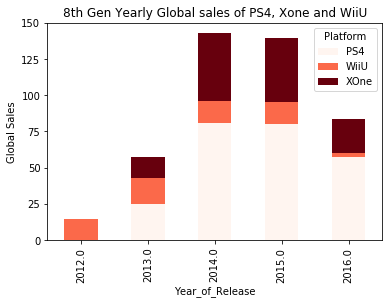

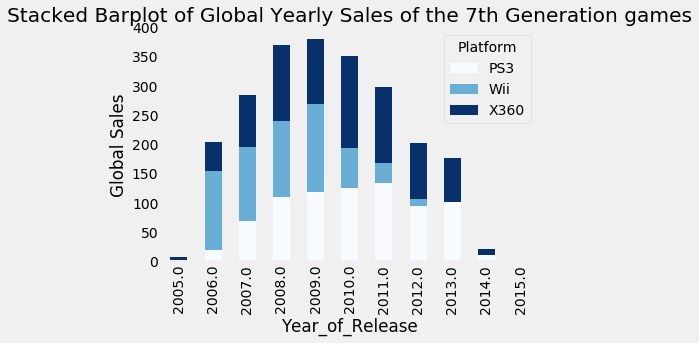

In [25]:
plt.figure(figsize = (10, 5))
yearly_sales_Gen8th.unstack().plot(kind = 'bar', colormap = 'Reds', stacked = True, grid = False)
plt.ylabel('Global Sales')
plt.title( '8th Gen Yearly Global sales of PS4, Xone and WiiU')
plt.style.use("fivethirtyeight")
plt.show()

yearly_sales_Gen7th.unstack().plot(kind = 'bar', stacked = True, colormap = 'Blues', grid = False )
plt.title('Stacked Barplot of Global Yearly Sales of the 7th Generation games')
plt.ylabel('Global Sales')
plt.style.use("fivethirtyeight")
plt.show()


Wii sales had its peak in 2009 because it was the first conole to come out with a type of virtual reality and it was very popular. However, it then tremendously decreased 2010-2015, because wii did not come out with more better high in demand games. 

As you can see 8th generation cosoles sold less globally from 2012 - 2016, because they were very expensive and 7th Gen consoles were still popular to play. 
8th genration console sold 4.38 million in the course of 5 years.
While 7th generation consoles sold about 22.96 million over 10 years.
This is so because 7th gen console sales has a better spread of data than the 8th Gen consoles. As you can see 8th Gen only has a course five years while 7th Gen has 10 years.

In [26]:
(Gen8th['Global_Sales']/100).sum()



4.3868

In [31]:
(Gen7th['Global_Sales']/100).sum()


22.965800000000002

### 2.  Which Genre of games sold more globally and perhapes  more popular to play.

##### I grouped the Genre with the global sales with a perecentage to give me an idea which genre of games are bought frequently. 

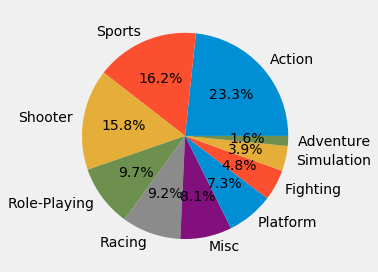

In [34]:
f,ax=plt.subplots(1,1,figsize=(4,4))
df_video_games.groupby("Genre")["Global_Sales"].sum().sort_values(ascending=False)[:10].plot.pie( autopct='%1.1f%%')
ax.set_ylabel("")
plt.tight_layout()





As you can see above Shooter, Sports and Action taking the lead are the top three games that where sold globally
Action games being the highest with 23.3%.
On that note if you wanted to know what type of games to by an individual, you wont go wrong in buying any of those top 3 games.


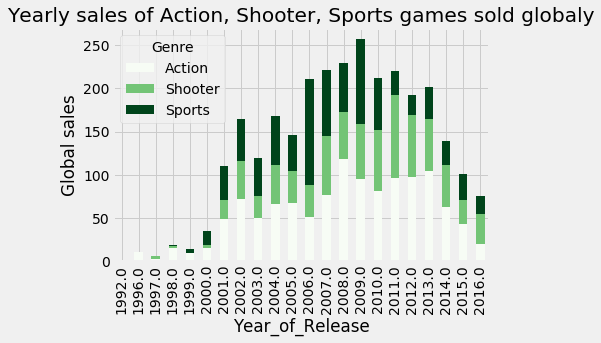

In [80]:
new_genre = df_video_games[(df_video_games['Genre'] == 'Shooter') | (df_video_games['Genre'] == 'Sports') | (df_video_games['Genre'] == 'Action')]
G_video = df_video_games.groupby(['Year_of_Release', 'Genre']).Global_Sales.sum()
G_video2 = new_genre.groupby(['Year_of_Release', 'Genre']).Global_Sales.sum()
G_video2.unstack().plot(kind = 'bar', colormap = 'Greens', stacked = True)
plt.ylabel('Global sales')
plt.title( 'Yearly sales of Action, Shooter, Sports games sold globaly')
plt.show()



This stacked chart supports the pie chart above. I took the most 4 popular genre of games from the pie chart and ploted there yearly sales. The three popular games sell great throughout the year from 2001 - 2016.

### 3. Now I want to know which gaming company earns the most globally.

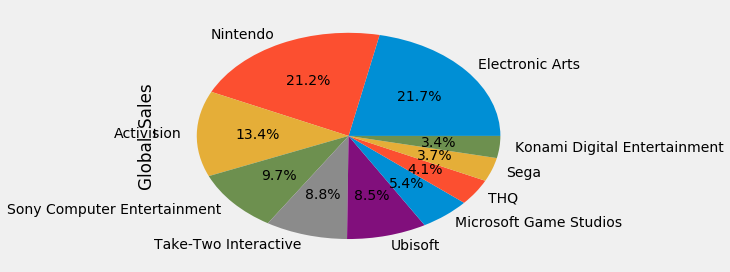

In [37]:
df_video_games.groupby("Publisher")["Global_Sales"].sum().sort_values(ascending=False)[:10].plot.pie( autopct='%1.1f%%')
ax.set_ylabel("")
plt.tight_layout()


To answer my question I see that Electronics Arts earns more globally (21.7%) following Nintendo then Activision.
This is so because those three publishers perfect in Shooter, Sports and Action games just from my experiences.

# Propose Business Oppurtunity.
## If I am a publisher (Activision, EA, Nintendo etc), to maximize my revenue I would want to know 
1. What Genre of games to put out.
2. What platform to release them on.
3. Including what platforms generates the most money with those genre.
4. What countries to focus on.

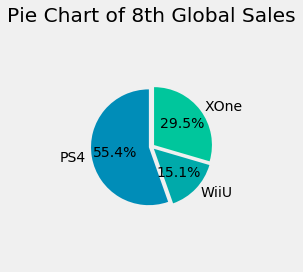

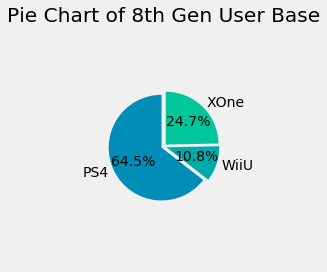

In [40]:
# Plotting our pie charts
# Create a list of colors 
colors = ['#008DB8','#00AAAA','#00C69C']
plt.subplot(121)
plt.pie(
   Gen8th.groupby('Platform').Global_Sales.sum(),
    # with the labels being platform
    labels=Gen8th.groupby('Platform').Global_Sales.sum().index,
    # with no shadows
    shadow=False,
    # stating our colors
    colors=colors,
    explode=(0.05, 0.05, 0.05),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%'
    )
plt.axis('equal')
plt.title('Pie Chart of 8th Gen Global Sales')

plt.axis('equal')
plt.title('Pie Chart of 8th Global Sales')
plt.tight_layout()
plt.show()

plt.subplot(122)
plt.pie(
   Gen8th.groupby('Platform').User_Count.sum(),
    labels=Gen8th.groupby('Platform').User_Count.sum().index,
    shadow=False,
    colors=colors,
    explode=(0.05, 0.05, 0.05),
    startangle=90,
    autopct='%1.1f%%'
    )
plt.axis('equal')
plt.title('Pie Chart of 8th Gen User Base')
plt.tight_layout()
plt.show()

According to my pie charts, If i am a publisher i would want to make more action, shooter and sports games for PS4 and xbox1 platforms just because globle sales are high in those platforms and there are alot more users on those platforms.

In [63]:
NA_Sales = Gen8th.groupby('Platform').NA_Sales.sum()

##### The bar chart below represents 8th generation platform sales in North America. If was a publisher I would make more games for PS4 and Xone platforms in America just because there sales are high.

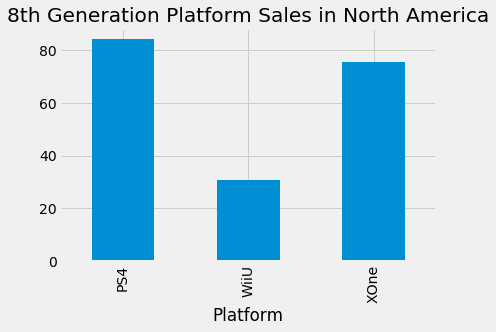

In [70]:
NA_Sales.plot(kind= 'bar' )
plt.title('8th Generation Platform Sales in North America')
plt.show()


##### In Europe publishers should make more games for PS4 because PS4 sales are tremendous and surpasses WIIU and XONE sales.

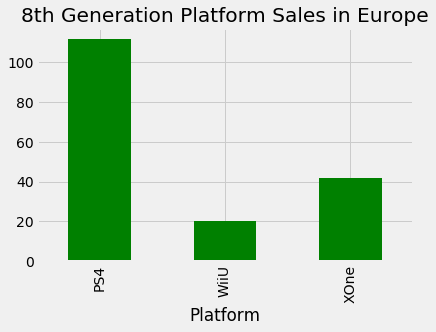

In [67]:
EU_Sales = Gen8th.groupby('Platform').EU_Sales.sum()
EU_Sales.plot(kind='bar', color = 'green')
plt.title('8th Generation Platform Sales in Europe')
plt.show()

##### As you can see below, XONE does not sell very well in Japan but extremely well in America and Europe. In Japan, publishers should focus more on WIIU games and PS4. This is no surprise because WIIU is made in Japan and very popular among natives in Japan.

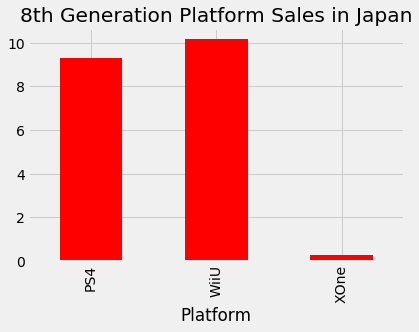

In [69]:
JP_Sales = Gen8th.groupby('Platform').JP_Sales.sum()
JP_Sales.plot(kind='bar', color = 'red')
plt.title('8th Generation Platform Sales in Japan')
plt.show()

## Conclusion 
Overall You cant go wrong with making PS4 games because for the most part there are more users using this consoles and PS4 sells way more globally than any other console. Furthur more Publishers can make more money making a lot more games in Shooter, Sports, and Action games in any console. 

# Furthur Research

Some limitations with my data set is that we have great spread of data for 7th generation consoles but not 8th generation consoles. This is so because 8th gen consoles just came out which makes it limited. So there is still more room in the future to see how well they sell. Also there are more new consoles that have just been released. So if we can get the same spread of data for 8th gen consoles just like 7th gen, our data set might be more consise. 

It would be very insightful if we could look at the publishers or platform earnings over time and how they changed over the spread of 10 years. That way we could see trends or patterns.